In [1]:
def knapSack(W , wt , val , n): 

    
    if n == 0 or W == 0 :
        return 0
        
    if (wt[n-1] > W):
        return knapSack(W , wt , val , n-1)
        
    else:
        a=val[n-1] + knapSack(W-wt[n-1] , wt , val , n-1)
        b=knapSack(W , wt , val , n-1)
        return max(a, b)
        
    
   
    
        
val = [120, 100, 200, 140, 60, 50] 
wt = [30, 20, 40, 15, 10, 35] 
W = 70
n = len(val)

print(knapSack(W , wt , val, n))
print('\n')

print('selected items:')
print('\n')


for i in range (0,len(val)):
    if W-wt[i] >= 0 :
        a=val[i] + knapSack(W-wt[i] , wt[:i]+wt[i+1:] , val[:i]+val[i+1:] , n-1)
        b=knapSack(W , wt[:i]+wt[i+1:] , val[:i]+val[i+1:] , n-1)
        if a>b:
            print('weight=%i value=%i' %(wt[i] , val[i]))


400


selected items:


weight=40 value=200
weight=15 value=140
weight=10 value=60


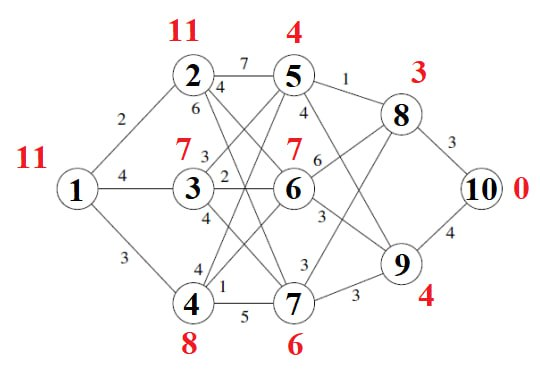

In [3]:
def sd(graph):
    global INF
    N = len(graph)

    dist = [0] * N
    pred = [-1] * N
    dist[N - 1] = 0

    for i in range(N - 2, -1, -1):
        dist[i] = INF
        for j in range(N):
            if graph[i][j] == INF:
                continue
            d = graph[i][j] + dist[j]
            if d < dist[i]:
                dist[i] = d
                pred[i] = j

    path = []
    current = 0
    while current != N - 1:
        path.append(current+1)
        current = pred[current]
    path.append(N)
    path.reverse()

    return dist[0], path


INF = 999999999999
graph = [[INF, 2, 4, 3, INF, INF, INF, INF, INF, INF],
         [INF, INF, INF, INF, 7, 4, 6, INF, INF, INF],
         [INF, INF, INF, INF, 3, 2, 4, INF, INF, INF],
         [INF, INF, INF, INF, 4, 1, 5, INF, INF, INF],
         [INF, INF, INF, INF, INF, INF, INF, 1, 4, INF],
         [INF, INF, INF, INF, INF, INF, INF, 6, 3, INF],
         [INF, INF, INF, INF, INF, INF, INF, 3, 3, INF],
         [INF, INF, INF, INF, INF, INF, INF, INF, INF, 3],
         [INF, INF, INF, INF, INF, INF, INF, INF, INF, 4],
         [INF, INF, INF, INF, INF, INF, INF, INF, INF, INF]]

dist, path = sd(graph)
print("Shortest distance:", dist)
print("Shortest path:", path)


Shortest distance: 11
Shortest path: [10, 8, 5, 3, 1]


In [4]:
import sys

NO_PARENT = -1

def SP(adjacency_matrix, start_vertex):
	n_vertices = len(adjacency_matrix[0])

	# shortest_distances[i] will hold the
	# shortest distance from start_vertex to i
	shortest_distances = [sys.maxsize] * n_vertices

	# added[i] will true if vertex i is
	# included in shortest path tree
	# or shortest distance from start_vertex to
	# i is finalized
	added = [False] * n_vertices

	# Initialize all distances as
	# INFINITE and added[] as false
	for vertex_index in range(n_vertices):
		shortest_distances[vertex_index] = sys.maxsize
		added[vertex_index] = False
		
	# Distance of source vertex from
	# itself is always 0
	shortest_distances[start_vertex] = 0

	# Parent array to store shortest
	# path tree
	parents = [-1] * n_vertices

	# The starting vertex does not
	# have a parent
	parents[start_vertex] = NO_PARENT

	# Find shortest path for all
	# vertices
	for i in range(1, n_vertices):
		# Pick the minimum distance vertex
		# from the set of vertices not yet
		# processed. nearest_vertex is
		# always equal to start_vertex in
		# first iteration.
		nearest_vertex = -1
		shortest_distance = sys.maxsize
		for vertex_index in range(n_vertices):
			if not added[vertex_index] and shortest_distances[vertex_index] < shortest_distance:
				nearest_vertex = vertex_index
				shortest_distance = shortest_distances[vertex_index]

		# Mark the picked vertex as
		# processed
		added[nearest_vertex] = True

		# Update dist value of the
		# adjacent vertices of the
		# picked vertex.
		for vertex_index in range(n_vertices):
			edge_distance = adjacency_matrix[nearest_vertex][vertex_index]
			
			if edge_distance > 0 and shortest_distance + edge_distance < shortest_distances[vertex_index]:
				parents[vertex_index] = nearest_vertex
				shortest_distances[vertex_index] = shortest_distance + edge_distance

	print_solution(start_vertex, shortest_distances, parents)


# A utility function to print
# the constructed distances
# array and shortest paths
def print_solution(start_vertex, distances, parents):
	n_vertices = len(distances)
	print("Vertex\t\t Distance\t\tPath")
	
	for vertex_index in range(n_vertices):
		if vertex_index != start_vertex:
			print("\n", start_vertex, "->", vertex_index, "\t\t", distances[vertex_index], "\t\t", end="")
			print_path(vertex_index, parents)


# Function to print shortest path
# from source to current_vertex
# using parents array
def print_path(current_vertex, parents):
	# Base case : Source node has
	# been processed
	if current_vertex == NO_PARENT:
		return
	print_path(parents[current_vertex], parents)
	print(current_vertex, end=" ")


# Driver code
if __name__ == '__main__':
	adjacency_matrix = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
                            [4, 0, 8, 0, 0, 0, 0, 11, 0],
                            [0, 8, 0, 7, 0, 4, 0, 0, 2],
                            [0, 0, 7, 0, 9, 14, 0, 0, 0],
                            [0, 0, 0, 9, 0, 10, 0, 0, 0],
                            [0, 0, 4, 14, 10, 0, 2, 0, 0],
                            [0, 0, 0, 0, 0, 2, 0, 1, 6],
                            [8, 11, 0, 0, 0, 0, 1, 0, 7],
                            [0, 0, 2, 0, 0, 0, 6, 7, 0]]
	SP(adjacency_matrix, 0)






Vertex		 Distance		Path

 0 -> 1 		 4 		0 1 
 0 -> 2 		 12 		0 1 2 
 0 -> 3 		 19 		0 1 2 3 
 0 -> 4 		 21 		0 7 6 5 4 
 0 -> 5 		 11 		0 7 6 5 
 0 -> 6 		 9 		0 7 6 
 0 -> 7 		 8 		0 7 
 0 -> 8 		 14 		0 1 2 8 